## Predictive Model – Multipple Linear Regression for data having categorical independent variable/s :

In this blog, we will try to implement the Multiple Linear Regression in python where some of the independent variable contain categorical data. We have already seen the implementation of Multiple Linear Regression, where all the independent variables contain were numerical variable, in my earlier blog. It can be seen at following link:
#### https://datasciencewithabhi.blogspot.com/2020/05/predictive-model-multiple-linear.html



To understand the implementation cycle, please see the following blog:
#### https://datasciencewithabhi.blogspot.com/2020/03/life-cycle-of-machine-learningml-project.html

** Please note that as part of this blog, we are not going for data collection or model deployment as part of implementation. Data is already available. In later blogs, we will cover some of the model selection techniques, deployment etc., as separate topics. Each of the areas like EDA, model selection, parameter hyper tuning etc. is vast and has many ways to do it. As part of different blogs, we will cover the different methods in each of the above mentioned area. Goal is to get the idea of model/intuition and implementation first and then more exploration in each of the topic can be done later. 


### Problem Statement : 
We will use Advertising.csv file for the implementation . However we will insert some of the categorical column for benefit of this blog . Advertising.csv data is about the amount spent on advertising through different channels like TV, Radio and Newspaper.We will use the newly inserted categorical variable for prediction too. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale? 

*Data file can be found at:

https://github.com/abhishek-knowledge-incubator/DataScience/blob/master/LinearRegression/Advertising.csv

### Solution:
*** Solution has been implemented in jupyter notebook. Please note that in many of the codes given below can be implemented in many ways like using different libraries , different logic etc.This blog is to introduce ML concepts and show you the implementation in one of the many ways 



In [39]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
% matpllotlib inline

UsageError: Line magic function `%` not found.


In [40]:
# Reading the file 
data= pd.read_csv('Advertising.csv') 
# After reading the data we will have to explore the data (EDA)
#Start of exploration -- will end at commnet # end of exploration
# see if the data has been read or not 
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [41]:
# to know the shape i.e. row and columns in data
data.shape

(200, 5)

In [42]:
# to get basic information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [43]:
# As per the result above the column is not-null column . 
#However let's check it
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

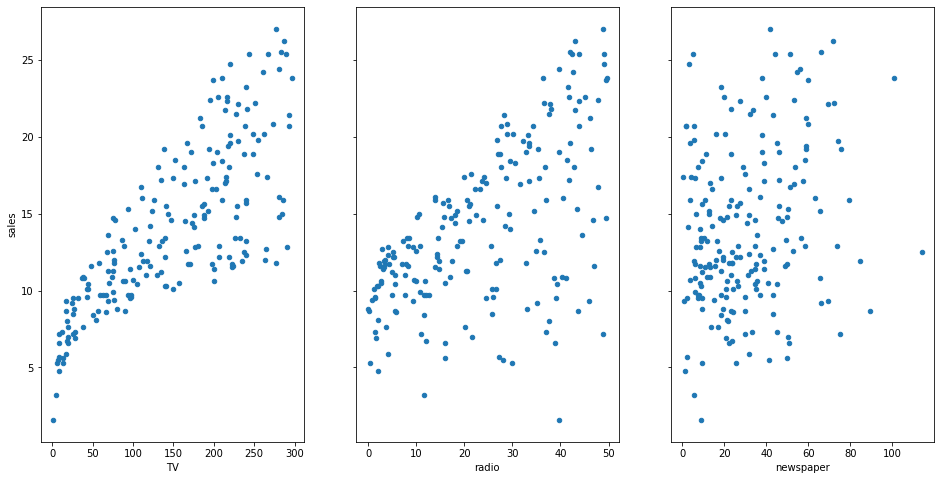

In [44]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

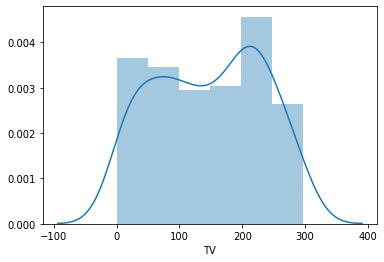

In [45]:
# the result above shows there is linear dependency between TV numbers , newspaper , radio 
#with sales number . Let's check the normality of data (independent variable)
sns.distplot(data['TV'], kde=True)


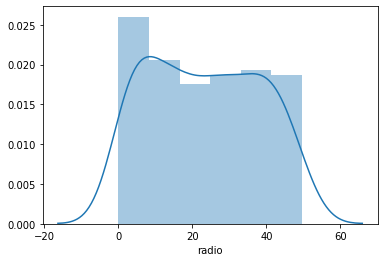

In [46]:
sns.distplot(data['radio'], kde=True)


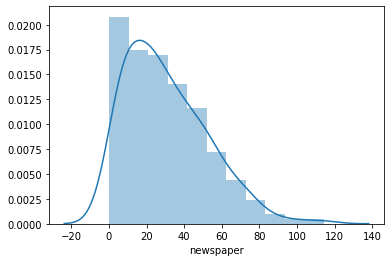

In [47]:
sns.distplot(data['newspaper'], kde=True)

####  Independent variables doesnot have totally normal distribution. However we can go ahead with the data for modeling

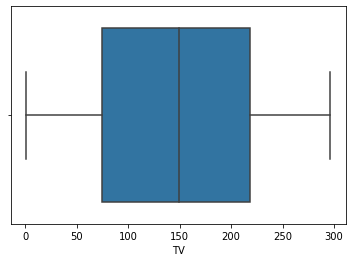

In [48]:
#let's check to find outlier through boxplot 
sns.boxplot(data['TV'])

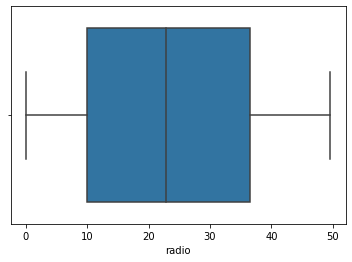

In [49]:
sns.boxplot(data['radio'])

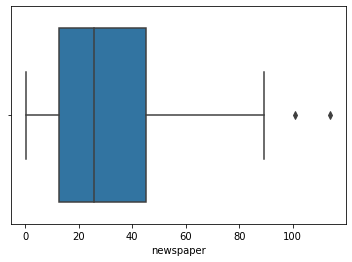

In [50]:
sns.boxplot(data['newspaper'])

In [51]:
# There is outlier , Let's remove the outlier by using z-score 
# Finding the data which are outlier 
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data['newspaper']))
data['z_value'] = z 
data[data['z_value'] > 3 ]


,Unnamed: 0,TV,radio,newspaper,sales,z_value
16,17,67.8,36.6,114.0,12.5,3.841171
101,102,296.4,36.3,100.9,23.8,3.238154


In [52]:
# removing the row which contain outlier
data.drop(data[data['z_value'] > 3 ].index, axis=0, inplace=True)
data.shape

(198, 6)

In [53]:
#checking of data has been removed or not 
data[data['z_value'] > 3 ]

,Unnamed: 0,TV,radio,newspaper,sales,z_value


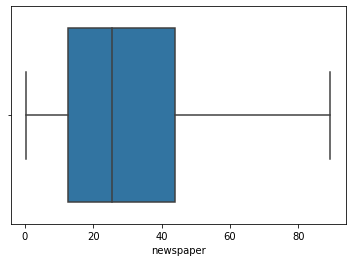

In [54]:
#checking of data has been removed or not using box plot 
sns.boxplot(data['newspaper'])

In [55]:
#let's find the multicollinearity among independent variable by VIF method 

X= data.drop(labels=['sales','z_value','Unnamed: 0'], axis=1)# X variable containing only independent variable

In [56]:
X.head() # checking X 

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [57]:
# finding VIF for all the independent variable 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,2.502183,TV
1,3.275285,radio
2,3.126386,newspaper


__Values for VIF is less than 4 , so we can consider there is not much multicollinear__. 
Hence we can go ahed with model creation 

In [58]:
# creating categorical data
# Let's insert some categorical value like scale for our study . this will contain the data 'small', ' large'.
# we will assign random 'scale' value to each of the row .

import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Scale'] = 'small'
data.loc[mask_large, 'Scale'] = 'large'
data.head()



,Unnamed: 0,TV,radio,newspaper,sales,z_value,Scale
0,1,230.1,37.8,69.2,22.1,1.778945,large
1,2,44.5,39.3,45.1,10.4,0.669579,small
2,3,17.2,45.9,69.3,9.3,1.783549,small
3,4,151.5,41.3,58.5,18.5,1.286405,small
4,5,180.8,10.8,58.4,12.9,1.281802,large


Please Note that for Linear Regression , the data should be there in numerical value . We will repesent the data in 'Scale' column in numerical format i.e. small will be represented as 0 and large will be represented as 1. 

In [59]:
# create a new Series called IsLarge
data['IsLarge'] = data.Scale.map({'small':0, 'large':1})
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,z_value,Scale,IsLarge
0,1,230.1,37.8,69.2,22.1,1.778945,large,1
1,2,44.5,39.3,45.1,10.4,0.669579,small,0
2,3,17.2,45.9,69.3,9.3,1.783549,small,0
3,4,151.5,41.3,58.5,18.5,1.286405,small,0
4,5,180.8,10.8,58.4,12.9,1.281802,large,1


In [68]:
# Let's use multiple regression  
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']
X = data[feature_cols]
y = data.sales

# Multiple Linear regression
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
i=0
for col in feature_cols:
    print('The Coefficient of ',col, ' is: ',lm.coef_[i])
    i=i+1




The Coefficient of  TV  is:  0.04567988176842194
The Coefficient of  radio  is:  0.18786292943692234
The Coefficient of  newspaper  is:  -0.0006186808081417028
The Coefficient of  IsLarge  is:  0.21270132477497616
1.258738043042392


How do we interpret the coefficient for **IsLarge**? For a given TV/Radio/Newspaper ad expenditure if the average sales increases by 21.27 widgets, it’s considered as a large market.

__What if the 0/1encoding is reversed?__

Still, the value of the coefficient shall be same, the only difference being the sign. It’ll be a negative number instead of positive.


Till now we have got the categorical variable having only two value . Let's see how to handle the case where the variable data has multiple categories

#### Evaluating (measuring accuracy) Regression Model

Apart from R-square and Adjusted R-square (explained in earlier blog),  there are some other methods to evaluate(measure accuracy) Linear Regression model. Those are :

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

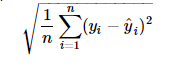
 
Mean Squared Error (MSE) is the mean of the squared errors:

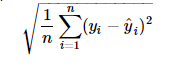
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

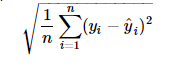

MSE is more popular than MAE because MSE "punishes" larger errors. But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

There are some other metrices are there for evaluating the error like AIC(Akaike’s Information Criteria),BIC (Bayesian information criteria) , Mallows Cp etc . 

Let's see the implementation of the above explained accuracy measure for the model 


In [70]:
from sklearn import metrics
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y, lm.predict(X)))
print(metrics.mean_squared_error(y, lm.predict(X)))
print(np.sqrt(metrics.mean_squared_error(y, lm.predict(X))))

1.258738043042392
2.799016656679935
1.6730261972485472


### Handling Categorical variables with More than Two Categories

Let's create a new column called **Targeted Geography**, and randomly assign observations to be **rural, suburban, or urban**:

In [61]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Targeted Geography'] = 'rural'
data.loc[mask_suburban, 'Targeted Geography'] = 'suburban'
data.loc[mask_urban, 'Targeted Geography'] = 'urban'
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,z_value,Scale,IsLarge,Targeted Geography
0,1,230.1,37.8,69.2,22.1,1.778945,large,1,rural
1,2,44.5,39.3,45.1,10.4,0.669579,small,0,urban
2,3,17.2,45.9,69.3,9.3,1.783549,small,0,rural
3,4,151.5,41.3,58.5,18.5,1.286405,small,0,urban
4,5,180.8,10.8,58.4,12.9,1.281802,large,1,suburban


We need to represent the ‘Targeted Geography’ column numerically. But mapping urban=0, suburban=1 and rural=2 will mean that rural is two times suburban which is not the case.
Hence, we’ll create another **dummy variable**:

In [62]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data['Targeted Geography'], prefix='Targeted Geography').iloc[:, 0:]
area_dummies.head()


,Targeted Geography_rural,Targeted Geography_suburban,Targeted Geography_urban
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


When we created dummies , it created 3 columns corresponding to categorical values ,i.e. rural, suburban,urban, and marked the value as 1 against the respective value . But this data can be represnted by 2 columns only . This is explained below :

In [63]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data['Targeted Geography'], prefix='Targeted Geography').iloc[:, 1:]
area_dummies.head()

,Targeted Geography_suburban,Targeted Geography_urban
0,0,0
1,0,1
2,0,0
3,0,1
4,1,0


What does the encoding say?
* rural is encoded as Targeted Geography_suburban=0 and Targeted Geography_urban=0
* suburban is encoded as Targeted Geography_suburban=1 and Targeted Geography_urban=0
* urban is encoded as Targeted Geography_suburban=0 and Targeted Geography_urban=1

Now the question is: **Why have we used two dummy columns instead of three?**

Because using only two dummy columns, we can capture the information of all the 3 columns. For example, if the value for Targeted Geography_urban as well as Targeted Geography_rural is 0, it automatically means that the data belongs to Targeted Geography_suburban.

This is called handling the **dummy variable trap**. If there are N dummy variable columns, then the same information can be conveyed by N-1 columns.
Let's include the two new dummy variables in the model:

In [64]:
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,z_value,Scale,IsLarge,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban
0,1,230.1,37.8,69.2,22.1,1.778945,large,1,rural,0,0
1,2,44.5,39.3,45.1,10.4,0.669579,small,0,urban,0,1
2,3,17.2,45.9,69.3,9.3,1.783549,small,0,rural,0,0
3,4,151.5,41.3,58.5,18.5,1.286405,small,0,urban,0,1
4,5,180.8,10.8,58.4,12.9,1.281802,large,1,suburban,1,0


In [65]:
#Let's use regression model :
# create X and y
feature_cols = ['TV', 'radio', 'newspaper','IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print(feature_cols, lm.coef_)

['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban'] [ 0.04568645  0.18845418 -0.00087693  0.19147247 -0.09601088 -0.14810608]


__Let’s end the blog here. Summary of what we have learned in this blog:__
1.	Basic Implementation of Multiple Linear Regression on a data having categorical values 
2.  Measuring accuracy of model(RMSE,MSE,MAE)
3.	Understanding creating dummies and dummy value Trap




### References: 	
1.	https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/



### Follow my blog: https://datasciencewithabhi.blogspot.com/
